In [67]:
import warnings
warnings.filterwarnings('ignore') 

In [68]:
import pandas as pd
import numpy as np
import qgrid
import scipy as sc
import numpy.matlib as matlib
import time
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from string import ascii_uppercase


db = np.loadtxt('segmentationT.data', delimiter = ',')

Y = db[:, 0]
Y = Y.astype(int)
X = db[:, 1:]



In [69]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

In [112]:
def fisher_index(X, plot=True):
    C = X.shape[1]
    indexes = np.zeros(19)

    j = 0
    for i in range(C):
        if_j = 0
        for k in range(C):
            if i == k:
                continue
            mean_i = np.mean(X[:,i])
            mean_k = np.mean(X[:,k])
            std_i = np.std(X[:,i])
            std_k = np.std(X[:,k])

            if_j += ((mean_i - mean_k)**2 )/(std_i**2 + std_k**2)
        indexes[j] = if_j
        j += 1

    indexes = indexes / np.max(indexes)
  
    if plot == True:
        x = np.array(np.linspace(0, C, C, endpoint=True))
        y = indexes
        plt.stem(x, y)
        plt.xlabel('Variables')
        plt.ylabel('Índice de fisher')
#         plt.xticks([i for i in range(19)])
        plt.show()    
    return indexes

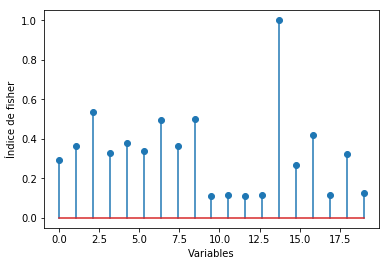

array([0.29051366, 0.363566  , 0.53682988, 0.32792082, 0.37997597,
       0.33666369, 0.49573453, 0.36476165, 0.49791019, 0.11321004,
       0.11542256, 0.11086679, 0.11577373, 1.        , 0.26722989,
       0.41977346, 0.11646422, 0.32151035, 0.1277568 ])

In [113]:
XA = X
scaler = MinMaxScaler()#Escala entre 0 y 1
Xt = scaler.fit_transform(XA)
fisher_index(Xt)

# Naive bayes

In [4]:
from sklearn.naive_bayes import GaussianNB

In [65]:
def model_NB(impresion = False):

    tiempo_i = time.time()

    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,7])
    recall_list = np.zeros([4,7])
    f_list = np.zeros([4,7])
    TN_list = np.zeros([4])
    FP_list = np.zeros([4])
    FN_list = np.zeros([4])
    TP_list = np.zeros([4])   
    errores = np.zeros(4)
    nb = GaussianNB()
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)

        nb.fit(Xtrain, Ytrain)
        pred = nb.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        #code for calculating confusion matrix 
        _confusion_matrix_ = confusion_matrix(Ytest, pred)
        TN_list[j] = _confusion_matrix_[0][0]
        FP_list[j] = _confusion_matrix_[0][1]
        FN_list[j] = _confusion_matrix_[1][0]
        TP_list[j] = _confusion_matrix_[1][1]
                
        errores[j] = classification_error(pred, Ytest)
          
    if impresion == True:
        j = 0
        cm = confusion_matrix(Ytest, pred)
        columnas = ['Clase %s'%(i) for i in list(ascii_uppercase)[0:len(np.unique(pred))]]
#         columnas = ['Clase %s'%(i) for i in list(int)[0:len(np.unique(pred))]]
        df_cm = pd.DataFrame(cm,index = columnas, columns = columnas)
        
        grafica = sns.heatmap(df_cm, cmap = 'Blues', annot = True)
        
        grafica.set(xlabel = 'Verdaderos', ylabel = 'Predicciones')
#         print(classification_report(Ytest, pred))

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

(578, 19)
(578, 19)
(578, 19)
(578, 19)
Eficiencia 0.7902249134948097  Int_Eficiencia 0.01353329398543427  Sensibilidad 0.7887054408795722  Int_Sensibilidad 0.2810061501942  Precision 0.8019974520512223  Int_Precision 0.20691780627207798  F-Score 0.7671931015572196  Int_F-Score 0.26074494745849164  Error_Prueba 0.2097750865051903  Int_Error 0.013533293985434272  Tiempo ejecución 0.07406735420227051


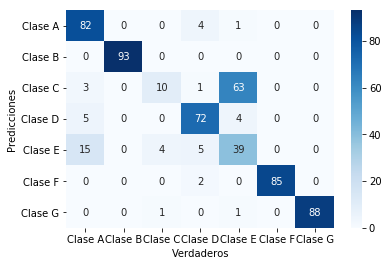

In [66]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_NB(impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

# KNN

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [32]:
def model_knn(k, impresion = False):

    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,7])
    recall_list = np.zeros([4,7])
    f_list = np.zeros([4,7])
    TN_list = np.zeros([4])
    FP_list = np.zeros([4])
    FN_list = np.zeros([4])
    TP_list = np.zeros([4])   
    errores = np.zeros(4)
    knn = KNeighborsClassifier(n_neighbors = k)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        knn.fit(Xtrain, Ytrain)
        pred = knn.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        #code for calculating confusion matrix 
        _confusion_matrix_ = confusion_matrix(Ytest, pred)
        TN_list[j] = _confusion_matrix_[0][0]
        FP_list[j] = _confusion_matrix_[0][1]
        FN_list[j] = _confusion_matrix_[1][0]
        TP_list[j] = _confusion_matrix_[1][1]
                
        errores[j] = classification_error(pred, Ytest)
           
    if impresion == True:
        cm = confusion_matrix(Ytest, pred)
        columnas = ['Clase %s'%(i) for i in list(ascii_uppercase)[0:len(np.unique(pred))]]
        df_cm = pd.DataFrame(cm,index = columnas, columns = columnas)
        
        grafica = sns.heatmap(df_cm, cmap = 'Blues', annot = True)
        
        grafica.set(xlabel = 'Verdaderos', ylabel = 'Predicciones')
#         print(classification_report(Ytest, pred))

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)


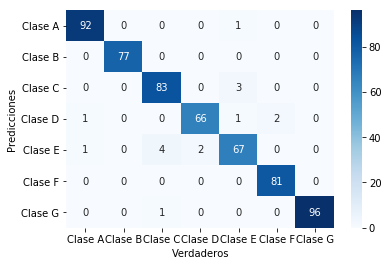

In [33]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_knn(1, impresion = True)

In [9]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de vecinos' : pd.Series(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Numero de vecinos'], inplace=True)

i = 0
for k in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_knn(int(k), impresion = False)
    df_types["Eficiencia"][i] = Acc
    df_types["Int_Eficiencia"][i] = IntAcc
    df_types["Sensibilidad"][i] = Sen
    df_types["Int_Sensibilidad"][i] = IntSen
    df_types["Precision"][i] = Pre
    df_types["Int_Precision"][i] = IntPre
    df_types["F-Score"][i] = f
    df_types["Int_F-Score"][i] = IntF
    df_types["Error_Prueba"][i] = error
    df_types["Int_error"][i] = stdError
    df_types["Tiempo de ejecución"][i] = tiempo
    
    i += 1
    
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [10]:
qgrid_widget.get_changed_df()

,Eficiencia,Int_Eficiencia,Sensibilidad,Int_Sensibilidad,Precision,Int_Precision,F-Score,Int_F-Score,Error_Prueba,Int_error,Tiempo de ejecución
Numero de vecinos,,,,,,,,,,,
1,0.9606401384083044,0.009815575880545178,0.9622414186756085,0.04603558222921342,0.9615395592535282,0.04498590098329251,0.9614360340583622,0.04134504181888695,0.0393598615916955,0.00981557588054517,0.09008145332336426
2,0.958910034602076,0.00796364733543338,0.9576365332669118,0.06218664828586016,0.9592165009009431,0.04324640204556939,0.9576947209969637,0.048012308082429345,0.041089965397923874,0.007963647335433376,0.09508705139160156
3,0.9545847750865052,0.0037457846184447844,0.9543190416309325,0.05226948899169199,0.9553199732911709,0.04840913511119899,0.9543310726536199,0.04624605700700285,0.045415224913494805,0.003745784618444804,0.09508609771728516
4,0.9554498269896193,0.006630497282333856,0.9565640089772742,0.05057233292109204,0.956315289149274,0.046798046055345655,0.9560306168213927,0.04506749153079457,0.04455017301038062,0.006630497282333862,0.0990915298461914
5,0.9446366782006921,0.005867067459450924,0.9434149632132848,0.06375697455110448,0.9440648365607885,0.05621095627150215,0.9431753062691636,0.05599860513886309,0.05536332179930796,0.005867067459450923,0.12711453437805176
6,0.9480968858131488,0.012415830531494209,0.9485226883019461,0.06351356087126578,0.9490487116419529,0.051150179434882134,0.9477536925770705,0.04950572102294391,0.05190311418685121,0.012415830531494226,0.10509562492370605
7,0.9489619377162629,0.004658447064995245,0.9490466687168552,0.05489450140579968,0.9495474706029663,0.04859075440318399,0.9487273885706813,0.047039095861410155,0.05103806228373703,0.004658447064995248,0.1040945053100586
8,0.9424740484429066,0.005786802837482529,0.9425657087739095,0.06265763517763555,0.9426384785049803,0.05901616562763458,0.9417335225599673,0.054906861031661584,0.05752595155709342,0.005786802837482547,0.10509586334228516
9,0.9467993079584776,0.003940498952917057,0.9446967141939321,0.06819720448826805,0.9453057718916229,0.0580269534329332,0.9440675549914389,0.057402443769669596,0.05320069204152249,0.003940498952917084,0.10709762573242188


# Redes Neuronales Artificiales

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
def model_MLP(nCO, nPC, impresion = False):
    if(nCO==1):
        mlp=MLPClassifier(activation='tanh',max_iter = 1000,hidden_layer_sizes=(nPC))
    else:
        mlp=MLPClassifier(activation='tanh',max_iter = 1000,hidden_layer_sizes=(nPC,nPC))
        
    tiempo_i = time.time()

    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,7])
    recall_list = np.zeros([4,7])
    f_list = np.zeros([4,7])
    TN_list = np.zeros([4])
    FP_list = np.zeros([4])
    FN_list = np.zeros([4])
    TP_list = np.zeros([4])   
    errores = np.zeros(4)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        mlp.fit(Xtrain, Ytrain)
        pred = mlp.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        #code for calculating confusion matrix 
        _confusion_matrix_ = confusion_matrix(Ytest, pred)
        TN_list[j] = _confusion_matrix_[0][0]
        FP_list[j] = _confusion_matrix_[0][1]
        FN_list[j] = _confusion_matrix_[1][0]
        TP_list[j] = _confusion_matrix_[1][1]
                
        
        errores[j] = classification_error(pred, Ytest)
       
    
    if impresion == True:
        cm = confusion_matrix(Ytest, pred)
        columnas = ['Clase %s'%(i) for i in list(ascii_uppercase)[0:len(np.unique(pred))]]
        df_cm = pd.DataFrame(cm,index = columnas, columns = columnas)
        
        grafica = sns.heatmap(df_cm, cmap = 'Blues', annot = True)
        
        grafica.set(xlabel = 'Verdaderos', ylabel = 'Predicciones')
#         print(classification_report(Ytest, pred))

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)
    

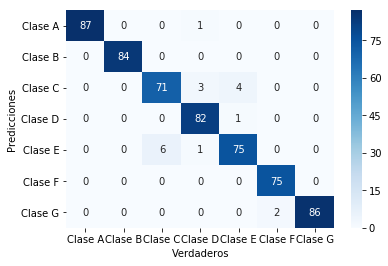

In [38]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_MLP(2, 15, impresion = True)

In [13]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'N. de capas ocultas' : pd.Series([1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2]),
    'Neuronas por capa' : pd.Series([5,10,15,20,25,30,35,40,45,50,5,10,15,20,25,30,35,40,45,50])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['N. de capas ocultas','Neuronas por capa'], inplace=True)
    
for n, k in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_MLP(n, k, impresion = False)
    df_types["Eficiencia"][n,k] = Acc
    df_types["Int_Eficiencia"][n,k] = IntAcc
    df_types["Sensibilidad"][n,k] = Sen
    df_types["Int_Sensibilidad"][n,k] = IntSen
    df_types["Precision"][n,k] = Pre
    df_types["Int_Precision"][n,k] = IntPre
    df_types["F-Score"][n,k] = f
    df_types["Int_F-Score"][n,k] = IntF
    df_types["Error_Prueba"][n,k] = error
    df_types["Int_error"][n,k] = stdError
    df_types["Tiempo de ejecución"][n,k] = tiempo
    
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)

In [14]:
qgrid_widget.get_changed_df()

Eficiencia  \
N. de capas ocultas Neuronas por capa                       
1                   5                  0.9247404844290656   
                    10                 0.9498269896193772   
                    15                 0.9615051903114187   
                    20                 0.9597750865051904   
                    25                 0.9628027681660899   
                    30                 0.9615051903114187   
                    35                 0.9619377162629759   
                    40                  0.953287197231834   
                    45                 0.9658304498269896   
                    50                 0.9615051903114187   
2                   5                  0.9602076124567474   
                    10                 0.9645328719723184   
                    15                 0.9658304498269896   
                    20                 0.9666955017301038   
                    25                 0.9662629757785467   
                    30                   0.96280276816609   
                    35                 0.9705882352941176   
                    40                 0.9779411764705882   
                    45                 0.9688581314878892   
                    50                 0.9658304498269896   

                                              Int_Eficiencia  \
N. de capas ocultas Neuronas por capa                          
1                   5                   0.008519773184944714   
                    10                  0.008022161328283447   
                    15                 0.0050994057623493395   
                    20                   0.00603989621270283   
                    25                  0.003566700368181375   
                    30                  0.007172631467031561   
                    35                  0.003670104400622223   
                    40                     0.004057453079432   
                    45                   0.00628280235568075   
                    50                  0.005384904670410347   
2                   5                   0.004410916534249827   
                    10                 0.0062976729146025446   
                    15                  0.004796944855713434   
                    20                  0.003088853126532387   
                    25                  0.005802944578286654   
                    30                  0.005261905303026135   
                    35                  0.003868629718857752   
                    40                  0.003940498952917071   
                    45                  0.005471068616208265   
                    50                  0.005656010739888427   

                                             Sensibilidad  \
N. de capas ocultas Neuronas por capa                       
1                   5                  0.9240405720376091   
                    10                 0.9497111861381473   
                    15                 0.9611841609308035   
                    20                 0.9599152317855421   
                    25                 0.9623484148129434   
                    30                 0.9607186475310393   
                    35                 0.9613409217350071   
                    40                 0.9554379517242857   
                    45                 0.9662207474790332   
                    50                 0.9604569218740358   
2                   5                  0.9616725332503944   
                    10                 0.9643166667345585   
                    15                 0.9655167926299024   
                    20                  0.965854764498234   
                    25                 0.9652178510380275   
                    30                 0.9641110340061517   
                    35                 0.9699641686764201   
                    40                 0.9781985861939291   
                    45                 0.9694849546437653   
              

# Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier # Se llama a la librería del método Random Forest

In [41]:
def model_RF(estimadores, caracteristicas, impresion = False):
        
    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,7])
    recall_list = np.zeros([4,7])
    f_list = np.zeros([4,7])
    TN_list = np.zeros([4])
    FP_list = np.zeros([4])
    FN_list = np.zeros([4])
    TP_list = np.zeros([4])   
    errores = np.zeros(4)
    
    RF = RandomForestClassifier(n_estimators=estimadores, max_features =caracteristicas)
    
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        RF.fit(Xtrain, Ytrain)
        pred = RF.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_

        #code for calculating confusion matrix 
        _confusion_matrix_ = confusion_matrix(Ytest, pred)
        TN_list[j] = _confusion_matrix_[0][0]
        FP_list[j] = _confusion_matrix_[0][1]
        FN_list[j] = _confusion_matrix_[1][0]
        TP_list[j] = _confusion_matrix_[1][1]
                
        
        errores[j] = classification_error(pred, Ytest)
       
    
    if impresion == True:
        cm = confusion_matrix(Ytest, pred)
        columnas = ['Clase %s'%(i) for i in list(ascii_uppercase)[0:len(np.unique(pred))]]
        df_cm = pd.DataFrame(cm,index = columnas, columns = columnas)
        
        grafica = sns.heatmap(df_cm, cmap = 'Blues', annot = True)
        
        grafica.set(xlabel = 'Verdaderos', ylabel = 'Predicciones')
#         print(classification_report(Ytest, pred))

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)
    

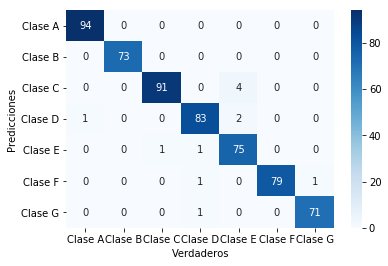

In [43]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(20, 10, impresion = True)

In [17]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]), 
    'Variables analizadas por nodo' : pd.Series([2,5,10,13,15,19,2,5,10,13,15,19,2,5,10,13,15,19,2,5,10,13,15,19,2,5,10,13,15,19])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)

for n, k in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(n, k, impresion = False)
    df_types["Eficiencia"][n,k] = Acc
    df_types["Int_Eficiencia"][n,k] = IntAcc
    df_types["Sensibilidad"][n,k] = Sen
    df_types["Int_Sensibilidad"][n,k] = IntSen
    df_types["Precision"][n,k] = Pre
    df_types["Int_Precision"][n,k] = IntPre
    df_types["F-Score"][n,k] = f
    df_types["Int_F-Score"][n,k] = IntF
    df_types["Error_Prueba"][n,k] = error
    df_types["Int_error"][n,k] = stdError
    df_types["Tiempo de ejecución"][n,k] = tiempo


#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)

In [18]:
qgrid_widget.get_changed_df()

Eficiencia  \
Numero de arboles Variables analizadas por nodo                       
5                 2                              0.9567474048442907   
                  5                              0.9602076124567475   
                  10                             0.9666955017301038   
                  13                             0.9697231833910034   
                  15                             0.9679930795847751   
                  19                             0.9710207612456747   
10                2                              0.9615051903114187   
                  5                              0.9666955017301038   
                  10                             0.9731833910034602   
                  13                             0.9710207612456748   
                  15                             0.9779411764705883   
                  19                             0.9645328719723183   
20                2                              0.9753460207612457   
                  5                              0.9788062283737025   
                  10                             0.9740484429065743   
                  13                             0.9731833910034602   
                  15                             0.9692906574394464   
                  19                             0.9740484429065743   
50                2                              0.9710207612456747   
                  5                               0.976643598615917   
                  10                             0.9692906574394463   
                  13                             0.9749134948096885   
                  15                             0.9788062283737023   
                  19                              0.972318339100346   
100               2                              0.9736159169550174   
                  5                              0.9740484429065744   
                  10                             0.9788062283737025   
                  13                             0.9757785467128027   
                  15                             0.9788062283737025   
                  19                             0.9710207612456748   

                                                        Int_Eficiencia  \
Numero de arboles Variables analizadas por nodo                          
5                 2                               0.008386989372692619   
                  5                               0.006811425496550022   
                  10                              0.004126034608204794   
                  13                              0.004969344849946391   
                  15                              0.009195627865687435   
                  19                              0.003088853126532387   
10                2                                0.00628280235568075   
                  5                                0.00910361815737419   
                  10                             0.0035667003681813343   
                  13                             0.0043035788802189626   
                  15                              0.007773443233395922   
                  19                              0.003566700368181375   
20                2                               0.007869119982119512   
                  5                               0.005384904670410363   
                  10                             0.0012233681335407191   
                  13                             0.0043252595155709225   
                  15                              0.007963647335433376   
                  19                              0.004410916534249827   
50                2                               0.008331038185232797   
                  5                               0.005117716075345692   
                  10                               0.00447408323217498   
                  13                             0.0025951557093425543   
        

# Maquinas de Soporte Vectorial con kernel lineal y con kernel RBF.

In [44]:
from sklearn.svm import SVC

In [45]:
def model_SVC(ker, C, gam, impresion = False):
    
    if gam == 0:
        gam = 'auto'
    
    tiempo_i = time.time()

    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,7])
    recall_list = np.zeros([4,7])
    f_list = np.zeros([4,7])
    TN_list = np.zeros([4])
    FP_list = np.zeros([4])
    FN_list = np.zeros([4])
    TP_list = np.zeros([4])   
    errores = np.zeros(4)
    PorcentajeVS = np.zeros(4)
    
    svc = SVC(gamma=gam, C=float(C),  kernel=ker, decision_function_shape='ovo' , probability = True)
    
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        svc.fit(Xtrain, Ytrain)
        pred = svc.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_

        #code for calculating confusion matrix 
        _confusion_matrix_ = confusion_matrix(Ytest, pred)
        TN_list[j] = _confusion_matrix_[0][0]
        FP_list[j] = _confusion_matrix_[0][1]
        FN_list[j] = _confusion_matrix_[1][0]
        TP_list[j] = _confusion_matrix_[1][1]
                
        errores[j] = classification_error(pred, Ytest)
        PorcentajeVS[j] = svc.support_vectors_.shape[0] / Xtrain.shape[0]
    
    if impresion == True:
        cm = confusion_matrix(Ytest, pred)
        columnas = ['Clase %s'%(i) for i in list(ascii_uppercase)[0:len(np.unique(pred))]]
        df_cm = pd.DataFrame(cm,index = columnas, columns = columnas)
        
        grafica = sns.heatmap(df_cm, cmap = 'Blues', annot = True)
        
        grafica.set(xlabel = 'Verdaderos', ylabel = 'Predicciones')
#         print(classification_report(Ytest, pred))

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(np.mean(PorcentajeVS)), str(time.time()-tiempo_i)
    

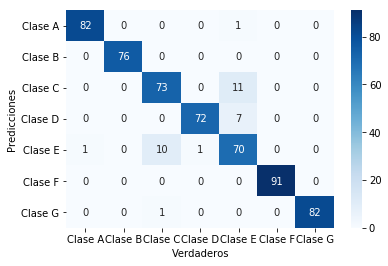

In [47]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError,vs, tiempo = model_SVC('linear', 300, 0, impresion = True)

In [21]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Kernel' : pd.Series(['linear','linear','linear','linear','linear','linear','linear','linear','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']),
    'C' : pd.Series([0.001,0.01,0.1,1,10,100,200,300,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,1,1,1,1,10,10,10,10,100,100,100,100,200,200,200,200,300,300,300,300]),
    'gamma' : pd.Series([0,0,0,0,0,0,0,0,0.001,0.01,0.1,1,0.001,0.01,0.1,1,0.001,0.01,0.1,1,0.001,0.01,0.1,1,0.001,0.01,0.1,1,0.001,0.01,0.1,1,0.001,0.01,0.1,1,0.001,0.01,0.1,1])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["%Vectores de soporte"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Kernel','C','gamma'], inplace=True)

for n, k, o in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError,vs, tiempo = model_SVC(n, k, o, impresion = False)
    df_types["Eficiencia"][n,k,o] = Acc
    df_types["Int_Eficiencia"][n,k,o] = IntAcc
    df_types["Sensibilidad"][n,k,o] = Sen
    df_types["Int_Sensibilidad"][n,k,o] = IntSen
    df_types["Precision"][n,k,o] = Pre
    df_types["Int_Precision"][n,k,o] = IntPre
    df_types["F-Score"][n,k,o] = f
    df_types["Int_F-Score"][n,k,o] = IntF
    df_types["Error_Prueba"][n,k,o] = error
    df_types["Int_error"][n,k,o] = stdError
    df_types["%Vectores de soporte"][n,k,o] = vs
    df_types["Tiempo de ejecución"][n,k,o] = tiempo


#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)

In [22]:
qgrid_widget.get_changed_df()

Eficiencia         Int_Eficiencia  \
Kernel C       gamma                                               
linear 0.001   0.000   0.2227508650519031    0.05239637300858875   
       0.010   0.000   0.5562283737024222   0.034439496950509296   
       0.100   0.000   0.8737024221453287   0.015328758777395639   
       1.000   0.000   0.9208477508650519   0.007378340012643585   
       10.000  0.000   0.9390138408304498   0.004126034608204794   
       100.000 0.000    0.948529411764706     0.0103354698489174   
       200.000 0.000    0.948961937716263   0.006974271408562745   
       300.000 0.000    0.958910034602076   0.006516660542093158   
rbf    0.001   0.001  0.12067474048442905  0.0025588580376728425   
               0.010  0.15657439446366783   0.057465756679039345   
               0.100   0.1241349480968858   0.005099405762349303   
               1.000  0.14878892733564014   0.047048009138017814   
       0.010   0.001  0.18728373702422146    0.11186546043998014   
               0.010  0.12543252595155707   0.005261905303026138   
               0.100  0.12673010380622837    0.00973904000795649   
               1.000   0.5536332179930796     0.0349677905387677   
       0.100   0.001   0.1245674740484429   0.010013699742898112   
               0.010   0.2435121107266436    0.01396864642037642   
               0.100   0.7716262975778547   0.023114860235099254   
               1.000   0.8953287197231834     0.0081608833322289   
       1.000   0.001  0.22491349480968859   0.027950682389971476   
               0.010   0.7833044982698962   0.030421675213850658   
               0.100   0.8905709342560553   0.013588475841180798   
               1.000   0.9333910034602076   0.010559304165859623   
       10.000  0.001   0.7573529411764707    0.03139018168828487   
               0.010   0.8901384083044983   0.014397333025167157   
               0.100   0.9307958477508651   0.003236727843230058   
               1.000   0.9649653979238755   0.011435384140486421   
       100.000 0.001   0.8849480968858131    0.01189249747825911   
               0.010   0.9320934256055364   0.003322294873645592   
               0.100   0.9619377162629759   0.012048778786491457   
               1.000   0.9649653979238754  0.0043035788802189626   
       200.000 0.001   0.9130622837370242   0.015540868705209045   
               0.010   0.9407439446366782  0.0068524997914164495   
               0.100   0.9649653979238755   0.005522121684603685   
               1.000   0.9705882352941176  0.0053325380648520295   
       300.000 0.001   0.9208477508650519   0.006162546214868099   
               0.010   0.9446366782006921   0.007541347653184551   
               0.100   0.9740484429065744  0.0021189357636532554   
               1.000   0.9727508650519031   0.004950485788174557   

                             Sensibilidad      Int_Sensibilidad  \
Kernel C       gamma                                              
linear 0.001   0.000  0.23967490842490843   0.41696588084645675   
       0.010   0.000   0.5778936854506311    0.4496821014030435   
       0.100   0.000   0.8750459425854743   0.12135720327265206   
       1.000   0.000   0.9233877318662753   0.09570367267044547   
       10.000  0.000   0.9400442987343907    0.0761581699674388   
       100.000 0.000   0.9494728600517134   0.05502409658238774   
       200.000 0.000   0.9489133274116787  0.054689191368350785   
       300.000 0.000   0.9590387866679467   0.04802057936693118   
rbf    0.001   0.001  0.14285714285714285    0.3499271061118826   
               0.010  0.17761904761904762   0.38097708253248774   
               0.100  0.14285714285714285    0.3499271061118826   
               1.000  0.17221135029354206    0.3705767660355329   
       0.010   0.001  0.20535714285714285   0.39428717002836855   
               0.010  0.14285714285714285    0.3499271061118826   
               0.100    0.144185405643739    0.3494210435820391   
               1.000   0.5794031474